In [ ]:
#|default_exp app

Gradio Mbira Classifier

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr


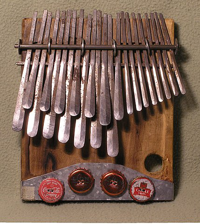

In [2]:
im = PILImage.create('mbira_dzavadzimu.jpg')
im.thumbnail((224,224))
im

In [4]:
#export
learn = load_learner('export.pkl')

In [5]:
learn.predict(im)

('nhare', tensor(1), tensor([0.0027, 0.9946, 0.0026]))

In [6]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'matepe': 0.0027463254518806934,
 'nhare': 0.9946314096450806,
 'nyunga nyunga': 0.0026222283486276865}

In [12]:
#export
image = gr.components.Image(shape=(192, 192))
label = gr.components.Label()
examples = ['mbira_dzavadzimu.jpg', 'mbira_matepe.jpg', 'mbira_nyunga_nyunga.jpg.webp']

In [13]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=True)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
